<h2>Рубежный контроль №1 по курсу "Методы машинного обучения"</h2>
<p><b>Вариант: </b> 11</p>
<p><b>Выполнил: </b> Саврасов П.А. группа ИУ5-24М</p>

<h3><b>Задание</b></h3>
<p><b>Задача №11:</b>
Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения отдельной категорией для пропущенных значений.
</p>
<p><b>Задача №31:</b>
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), прямой алгоритм (sequential forward selection).
</p>
<p><b>Дополнительное условие:</b>
Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".
</p>

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [94]:
loadedData = pd.read_csv('BankChurners.csv', sep=",")
print("Размер датасета:", loadedData.shape)
loadedData.head()

Размер датасета: (10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


<h3><b>Задача №11</b></h3>

In [95]:
columnsWithNull = []

print("Столбцы с пустыми значениями (название (число уникальных значений): число пустых):\n")
for column in loadedData.columns:
    if loadedData[column].isnull().sum() > 0:
        columnsWithNull.append(column)
        print("\t", column,"(", len(loadedData[column].unique()), "):\t", loadedData[column].isnull().sum())

Столбцы с пустыми значениями (название (число уникальных значений): число пустых):

	 Education_Level ( 7 ):	 1519
	 Marital_Status ( 4 ):	 749
	 Income_Category ( 6 ):	 1112


In [96]:
loadedData[columnsWithNull].head()

,Education_Level,Marital_Status,Income_Category
0,High School,Married,$60K - $80K
1,Graduate,Single,Less than $40K
2,Graduate,Married,$80K - $120K
3,High School,NaN,Less than $40K
4,Uneducated,Married,$60K - $80K


In [97]:
imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value = "Unknown")
nullFixedData = pd.DataFrame(data = imputer.fit_transform(loadedData), columns=loadedData.columns)
nullFixedData[columnsWithNull].head()

,Education_Level,Marital_Status,Income_Category
0,High School,Married,$60K - $80K
1,Graduate,Single,Less than $40K
2,Graduate,Married,$80K - $120K
3,High School,Unknown,Less than $40K
4,Uneducated,Married,$60K - $80K


<h3><b>Задача №31</b></h3>

In [98]:
labelEnc = LabelEncoder()
for column in nullFixedData.columns:
    if nullFixedData[column].dtype not in ['float', 'int']:
        nullFixedData[[column]] = pd.DataFrame(labelEnc.fit_transform(nullFixedData[column].astype(str)), columns=[column])
nullFixedData.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,7152,1,19,1,3,3,1,2,0,26,...,518,1757,524,987,90,68,791,58,1666,631
1,9812,1,23,0,5,2,2,4,0,31,...,5723,1841,5880,1073,240,59,829,102,1465,634
2,3053,1,25,1,3,2,1,3,0,23,...,3718,0,3963,1154,1443,46,818,0,1302,638
3,7204,1,14,0,4,3,3,4,0,21,...,3612,1458,6123,1020,110,46,818,757,148,627
4,501,1,14,1,3,5,1,2,0,8,...,4463,0,4698,1145,4705,54,821,0,1304,638


In [99]:
dataParam = nullFixedData[list(set(loadedData.columns) - set(["Avg_Utilization_Ratio"]))]
dataTarget = nullFixedData["Avg_Utilization_Ratio"]
TrainX,TestX,TrainY,TestY = train_test_split(dataParam, dataTarget, test_size=0.3, random_state = 1)

In [101]:
for column in TrainX.columns:
    
    randForest = RandomForestRegressor(n_estimators=5)
    randForest.fit(TrainX[[column]], TrainY)
    rFPredict = randForest.predict(TestX[[column]])
    
    logReg = LogisticRegression()
    logReg.fit(TrainX[[column]], TrainY)
    logRegPredict = logReg.predict(TestX[[column]])
    
    print("Средняя абсолютная ошибка на колонке ", column)
    print("     RandomForestRegressor",round(mean_absolute_error(TestY, rFPredict),6))
    print("     LogisticRegression",round(mean_absolute_error(TestY, logRegPredict),6))

Средняя абсолютная ошибка на колонке  Contacts_Count_12_mon
     RandomForestRegressor 237.309058
     LogisticRegression 274.526489
Средняя абсолютная ошибка на колонке  Total_Revolving_Bal
     RandomForestRegressor 181.13548
     LogisticRegression 229.687068
Средняя абсолютная ошибка на колонке  Attrition_Flag
     RandomForestRegressor 232.382939
     LogisticRegression 274.526489
Средняя абсолютная ошибка на колонке  Marital_Status
     RandomForestRegressor 238.598065
     LogisticRegression 274.526489
Средняя абсолютная ошибка на колонке  Dependent_count
     RandomForestRegressor 237.89918
     LogisticRegression 274.526489
Средняя абсолютная ошибка на колонке  Customer_Age
     RandomForestRegressor 237.915708
     LogisticRegression 274.526489
Средняя абсолютная ошибка на колонке  Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
     RandomForestRegressor 239.665812
     LogisticRegression 274.

<h3><b>Дополнительное условие</b></h3>

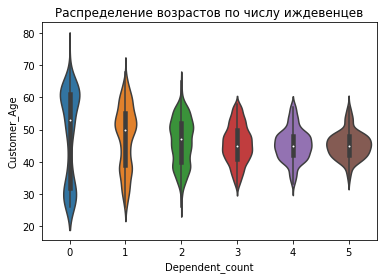

In [116]:
fig, ax = plt.subplots()

xdata = nullFixedData["Dependent_count"].astype(str).astype(int)
ydata = nullFixedData["Customer_Age"].astype(str).astype(int)

ax = sns.violinplot(x = xdata, y = ydata)

ax.set_title('Распределение возрастов по числу иждевенцев')
plt.show()